In [2]:
import pandas as pd 
import numpy as np

## Series

In [3]:
pd.Series(np.random.rand(5), index = ['a','b','c','d','e'])

a    0.935256
b    0.766976
c    0.711670
d    0.988089
e    0.655128
dtype: float64

In [4]:
s = pd.Series(np.random.rand(5))
print(s)

0    0.306552
1    0.762984
2    0.406607
3    0.004232
4    0.435908
dtype: float64


In [5]:
#Index
print(s[0])
print('\n')
print(s[:3])

0.3065521702697477


0    0.306552
1    0.762984
2    0.406607
dtype: float64


## DataFrame

In [6]:
#Create dataframe

df = pd.DataFrame(s, columns = ['Column 1'])
df

,Column 1
0,0.306552
1,0.762984
2,0.406607
3,0.004232
4,0.435908


In [7]:
df['Column 1']

0    0.306552
1    0.762984
2    0.406607
3    0.004232
4    0.435908
Name: Column 1, dtype: float64

In [8]:
df['Column 2'] = df['Column 1'] * 4
df

,Column 1,Column 2
0,0.306552,1.226209
1,0.762984,3.051935
2,0.406607,1.626429
3,0.004232,0.016929
4,0.435908,1.743633


In [9]:
# does not sort in place creates a new sorted df
df.sort_values(by = 'Column 2')

,Column 1,Column 2
3,0.004232,0.016929
0,0.306552,1.226209
2,0.406607,1.626429
4,0.435908,1.743633
1,0.762984,3.051935


In [10]:
# Boolean indexing 

df[df['Column 2'] <= 2]

,Column 1,Column 2
0,0.306552,1.226209
2,0.406607,1.626429
3,0.004232,0.016929
4,0.435908,1.743633


In [11]:
# applied on column 
# can apply on row I think when axis is changed

df.apply(lambda x: min(x) + max(x))

Column 1    0.767216
Column 2    3.068864
dtype: float64

In [12]:
df.describe()

,Column 1,Column 2
count,5.000000,5.000000
mean,0.383257,1.533027
std,0.272513,1.090052
min,0.004232,0.016929
25%,0.306552,1.226209
50%,0.406607,1.626429
75%,0.435908,1.743633
max,0.762984,3.051935


In [13]:
np.mean(df)

Column 1    0.383257
Column 2    1.533027
dtype: float64

## Data Science 

1. Ask Question 
2. Get the Data 
3. Explore
4. Model 
5. Communicate


## Exploring a DataSet

In [49]:
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline
plt.style.use('ggplot')

In [50]:
df = pd.read_csv('climate_data/GlobalTemperatures.csv')
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [51]:
dLAT = df.iloc[:,:2]
dLAT.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [52]:
dLAT.describe()

,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


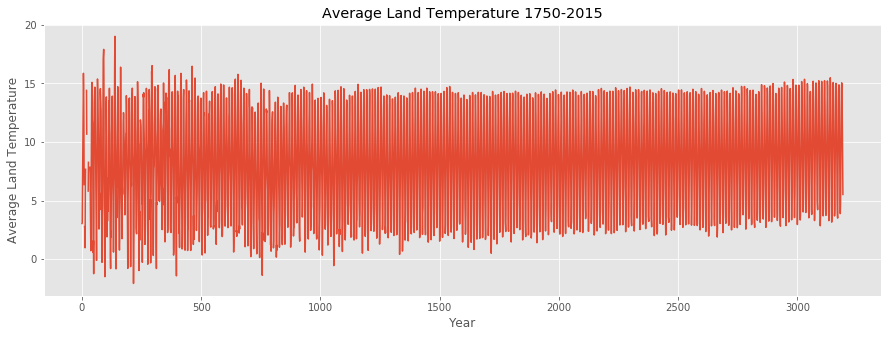

In [53]:
# Cursory plot 
plt.figure(figsize = (15,5))
plt.plot(dLAT['LandAverageTemperature'])
plt.title("Average Land Temperature 1750-2015")
plt.xlabel("Year")
plt.ylabel("Average Land Temperature")
plt.show()

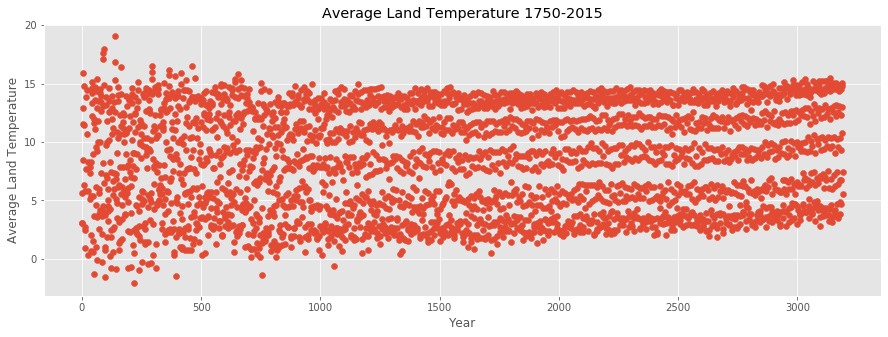

In [54]:
plt.figure(figsize = (15,5))
plt.scatter(x = dLAT['LandAverageTemperature'].index, y = dLAT['LandAverageTemperature'])
plt.title("Average Land Temperature 1750-2015")
plt.xlabel("Year")
plt.ylabel("Average Land Temperature")
plt.show()

- Hard to see trend 
- Average over the year to see a better trend
- Date time column is of type string not date time object

In [55]:
print(type(dLAT['dt'][0]))

<class 'str'>


In [64]:
# Convert to datetime object
times = pd.DatetimeIndex(dLAT['dt'])

# Group by year
grouped = dLAT.groupby([times.year]).mean()

In [65]:
grouped

,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333
...,...
2011,9.516000
2012,9.507333
2013,9.606500


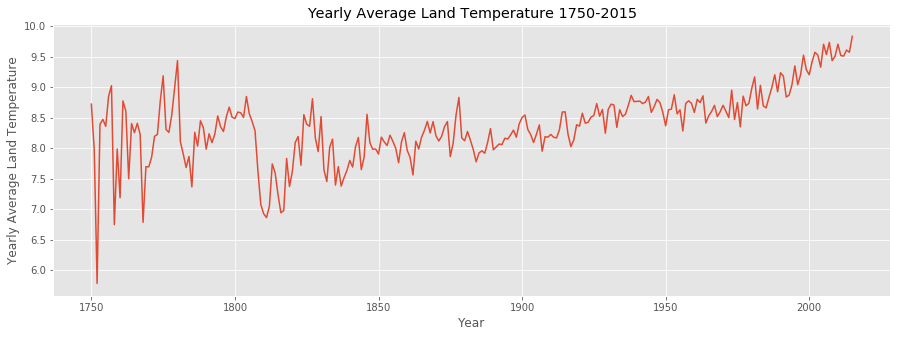

In [66]:
plt.figure(figsize = (15,5))
plt.plot(grouped['LandAverageTemperature'])

plt.title("Yearly Average Land Temperature 1750-2015")
plt.xlabel('Year')
plt.ylabel("Yearly Average Land Temperature")
plt.show()

In [67]:
grouped.head()

,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [70]:
dLAT[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


In [71]:
dLAT[np.isnan(df["LandAverageTemperature"])]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [76]:
# use previous valid observation to fill gap

dLAT['LandAverageTemperature'] = dLAT['LandAverageTemperature'].fillna(method='ffill')
dLAT[np.isnan(df["LandAverageTemperature"])]

,dt,LandAverageTemperature
10,1750-11-01,6.367
16,1751-05-01,7.670
18,1751-07-01,13.827
21,1751-10-01,10.673
22,1751-11-01,10.673
23,1751-12-01,10.673
25,1752-02-01,0.348
28,1752-05-01,8.265
29,1752-06-01,8.265
30,1752-07-01,8.265


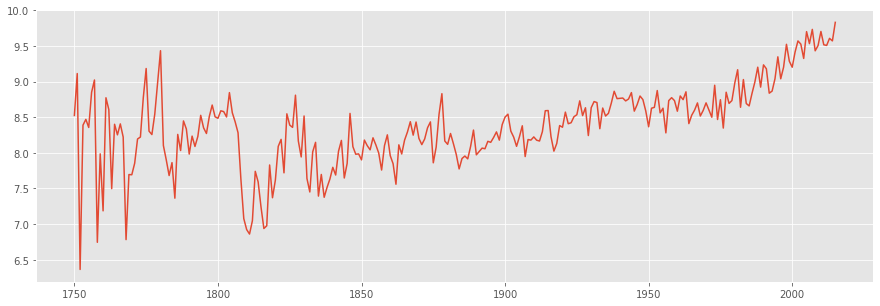

In [77]:
grouped = dLAT.groupby([times.year]).mean()


plt.figure(figsize = (15,5))
plt.plot(grouped['LandAverageTemperature'])
plt.show()

## Model

linear Regression

In [78]:
from sklearn.linear_model import LinearRegression as LinReg

In [91]:
x = grouped.index.values.reshape(-1,1)
y = grouped['LandAverageTemperature'].values

In [85]:
reg = LinReg()
reg.fit(x,y)
y_preds = reg.predict(x)
print("Accuracy: " + str(reg.score(x,y)))

Accuracy: 0.37668322753090727


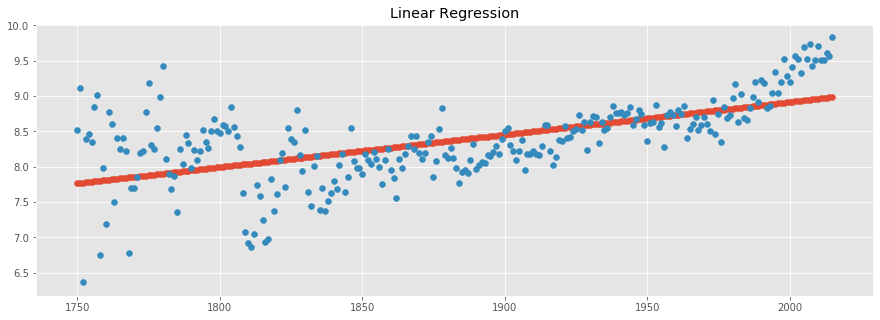

In [93]:
plt.figure(figsize = (15,5))
plt.title("Linear Regression")
plt.scatter(x = x, y = y_preds)
plt.scatter(x = x, y = y)

In [100]:
# need a 2D

reg.predict(np.array(2050).reshape(-1,1))

array([9.14631486])